# Assignment 9
## Roll Number `31311`

## Data Analytics II
- Implement	logistic	regression	using	Python/R	to	perform classification on Social_Network_Ads.csv dataset.
- Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.



In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [78]:
os.listdir()

['Assignment9.ipynb', 'Social_Network_Ads.csv', 'social-network-ads.zip']

In [79]:
df = pd.read_csv("./Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


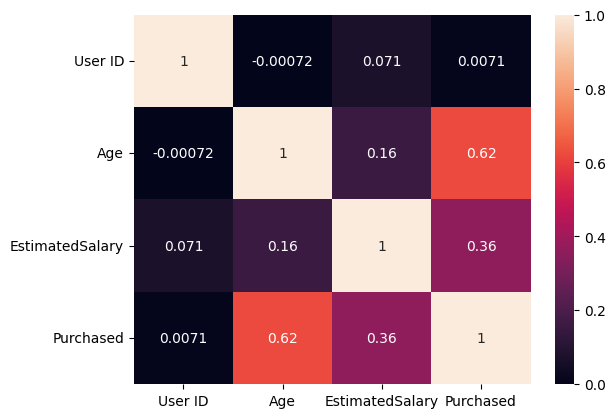

In [80]:
corr = df.corr('pearson', numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
X = df[['Age']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

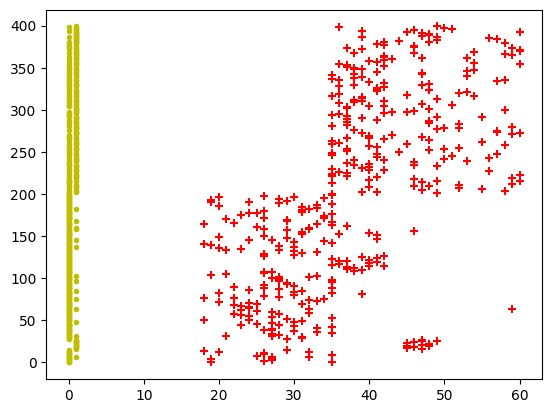

In [100]:
plt.scatter(df['Age'], range(len(df)), marker='+', color='r')
plt.scatter(df['Purchased'], range(len(df)), marker='.', color='y')
plt.show()

In [101]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()

In [102]:
logr.fit(X_train, y_train)

LogisticRegression()

In [103]:
test_prediction = logr.predict(X_test)

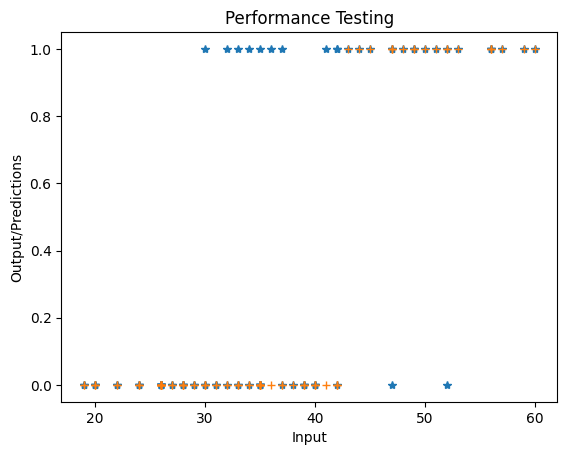

In [104]:
plt.plot(X_test, y_test, '*')
plt.plot(X_test, test_prediction, '+')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output/Predictions')
plt.show()

In [136]:
plt.style.use('dark_background')
def plot_logistic_regression(X, y, model):
    # Generate age values (X range)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_df = pd.DataFrame(X_range, columns=X.columns)
    # Predict probability of purchase
    y_prob = model.predict_proba(X_range_df)[:, 1]  # Probability of class 1

    # Scatter plot of data points
    plt.scatter(X, y, color='yellow', alpha=0.5, label="Actual Data")
    
    plt.plot(X_range, y_prob, color='red', linewidth=2, label="Logistic Regression Curve")
    
    # Labels and title
    plt.xlabel("Age")
    plt.ylabel("Probability of Purchase")
    plt.title("Logistic Regression - Decision Boundary")
    plt.legend()
    plt.show()


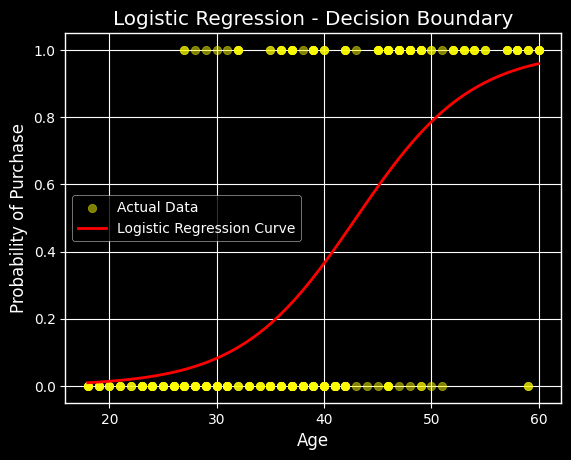

In [137]:
# Call the function with your trained model
plot_logistic_regression(X_train, y_train, logr)

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np


In [139]:
y_pred = logr.predict(X_test)  # Predict labels using trained model


In [140]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Extract values


In [141]:
accuracy = accuracy_score(y_test, y_pred)  # (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy  # 1 - Accuracy
precision = precision_score(y_test, y_pred)  # TP / (TP + FP)
recall = recall_score(y_test, y_pred)  # TP / (TP + FN)


In [142]:
print(f"Confusion Matrix:\n TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 TP: 18, FP: 2, TN: 50, FN: 10
Accuracy: 0.85
Error Rate: 0.15
Precision: 0.90
Recall: 0.64


In [143]:
cm = confusion_matrix(y_test, y_pred)


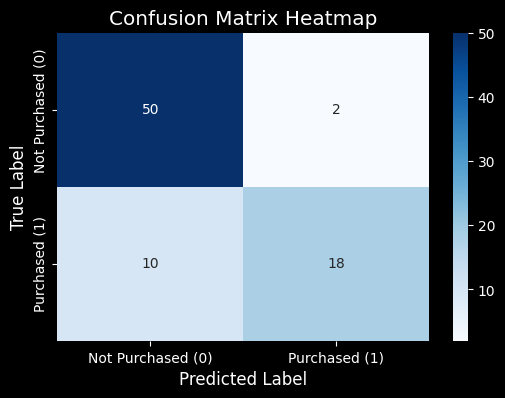

In [144]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased (0)", "Purchased (1)"], yticklabels=["Not Purchased (0)", "Purchased (1)"])
# Labels, Title, and Formatting
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()